<a href="https://colab.research.google.com/github/Vitormateusromancini/Repositorio-ERAMIA/blob/main/Semantic_chunk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
with open('/content/test.md') as file:
    essay = file.read()

In [2]:
import re

# Splitting the essay on '.', '?', and '!'
single_sentences_list = re.split(r'(?<=[.?!])\s+', essay)
print (f"{len(single_sentences_list)} sentenças foram encontradas")

4024 sentenças foram encontradas


In [3]:
sentences = [{'sentence': x, 'index' : i} for i, x in enumerate(single_sentences_list)]
sentences[:3]

[{'sentence': '<!-- image -->\n\nPRÓ-REITORIA DE GRADUAÇãO\n\n1\n\n<!-- image -->\n\n## DADOS DE IDENTIFICAÇÃO INSTITUCIONAL DO CURSO\n\nCAMPUS DE OFERTA:\n\nCampus Sede\n\nNOME DO CURSO\n\n: Engenharia de Computação\n\nTÍTULO CONFERIDO\n\n: Bacharel em Engenharia de Computação\n\n## PORTARIA DE AUTORIZAÇÃO/RECONHECIMENTO/RENOVAÇÃO:\n\nPortaria n.',
  'index': 0},
 {'sentence': '297/2013/MEC (Reconhecimento)\n\nRegistro e-MEC n.',
  'index': 1},
 {'sentence': '201204260\n\nData da publicação: 10/07/2013 Portaria n.',
  'index': 2}]

In [4]:
def combine_sentences(sentences, buffer_size=1):

    for i in range(len(sentences)):


        combined_sentence = ''

        for j in range(i - buffer_size, i):
            if j >= 0:

                combined_sentence += sentences[j]['sentence'] + ' '

        combined_sentence += sentences[i]['sentence']

        for j in range(i + 1, i + 1 + buffer_size):

            if j < len(sentences):

                combined_sentence += ' ' + sentences[j]['sentence']

        sentences[i]['combined_sentence'] = combined_sentence

    return sentences

sentences = combine_sentences(sentences)

In [5]:
sentences[:3]

[{'sentence': '<!-- image -->\n\nPRÓ-REITORIA DE GRADUAÇãO\n\n1\n\n<!-- image -->\n\n## DADOS DE IDENTIFICAÇÃO INSTITUCIONAL DO CURSO\n\nCAMPUS DE OFERTA:\n\nCampus Sede\n\nNOME DO CURSO\n\n: Engenharia de Computação\n\nTÍTULO CONFERIDO\n\n: Bacharel em Engenharia de Computação\n\n## PORTARIA DE AUTORIZAÇÃO/RECONHECIMENTO/RENOVAÇÃO:\n\nPortaria n.',
  'index': 0,
  'combined_sentence': '<!-- image -->\n\nPRÓ-REITORIA DE GRADUAÇãO\n\n1\n\n<!-- image -->\n\n## DADOS DE IDENTIFICAÇÃO INSTITUCIONAL DO CURSO\n\nCAMPUS DE OFERTA:\n\nCampus Sede\n\nNOME DO CURSO\n\n: Engenharia de Computação\n\nTÍTULO CONFERIDO\n\n: Bacharel em Engenharia de Computação\n\n## PORTARIA DE AUTORIZAÇÃO/RECONHECIMENTO/RENOVAÇÃO:\n\nPortaria n. 297/2013/MEC (Reconhecimento)\n\nRegistro e-MEC n.'},
 {'sentence': '297/2013/MEC (Reconhecimento)\n\nRegistro e-MEC n.',
  'index': 1,
  'combined_sentence': '<!-- image -->\n\nPRÓ-REITORIA DE GRADUAÇãO\n\n1\n\n<!-- image -->\n\n## DADOS DE IDENTIFICAÇÃO INSTITUCIONAL DO CU

In [6]:
%pip install -U langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 93.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 444.0/444.0 kB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.74
    Uninstalling langchain-core-0.3.74:
      Successfully uninstalled langchain-core-0.3.74
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


In [7]:
from langchain.embeddings import HuggingFaceEmbeddings

oaiembeds = HuggingFaceEmbeddings(
    model_name="BAAI/bge-base-en-v1.5"
)

/tmp/ipython-input-2547358861.py:3: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  oaiembeds = HuggingFaceEmbeddings(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/777 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [8]:
embeddings = oaiembeds.embed_documents([x['combined_sentence'] for x in sentences])

In [9]:
for i, sentence in enumerate(sentences):
    sentence['combined_sentence_embedding'] = embeddings[i]

In [10]:
from sklearn.metrics.pairwise import cosine_similarity

def calculate_cosine_distances(sentences):
    distances = []
    for i in range(len(sentences) - 1):
        embedding_current = sentences[i]['combined_sentence_embedding']
        embedding_next = sentences[i + 1]['combined_sentence_embedding']

        similarity = cosine_similarity([embedding_current], [embedding_next])[0][0]

        distance = 1 - similarity

        distances.append(distance)

        sentences[i]['distance_to_next'] = distance


    return distances, sentences

In [11]:
distances, sentences = calculate_cosine_distances(sentences)

In [12]:
distances[:3]

[np.float64(0.012173250615965081),
 np.float64(0.1710618850439749),
 np.float64(0.1402760092017764)]

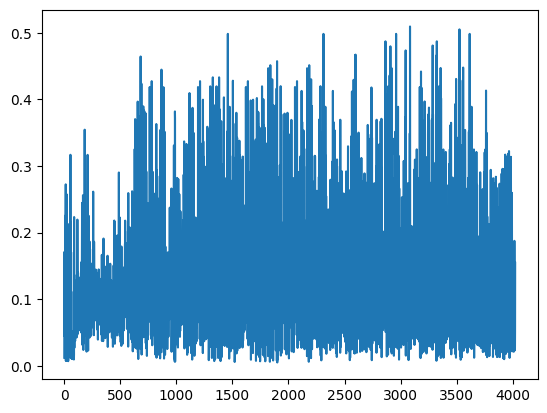

In [13]:
import matplotlib.pyplot as plt

plt.plot(distances);

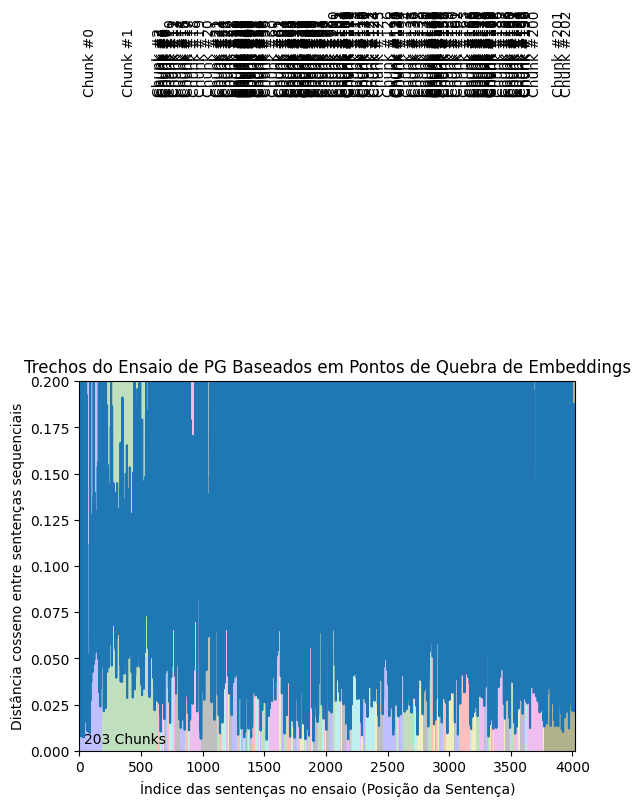

In [14]:
import numpy as np

plt.plot(distances);

y_upper_bound = .2
plt.ylim(0, y_upper_bound)
plt.xlim(0, len(distances))

breakpoint_percentile_threshold = 95
breakpoint_distance_threshold = np.percentile(distances, breakpoint_percentile_threshold)
plt.axhline(y=breakpoint_distance_threshold, color='r', linestyle='-');


num_distances_above_theshold = len([x for x in distances if x > breakpoint_distance_threshold])
plt.text(x=(len(distances)*.01), y=y_upper_bound/50, s=f"{num_distances_above_theshold + 1} Chunks");

indices_above_thresh = [i for i, x in enumerate(distances) if x > breakpoint_distance_threshold]

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i, breakpoint_index in enumerate(indices_above_thresh):
    start_index = 0 if i == 0 else indices_above_thresh[i - 1]
    end_index = breakpoint_index if i < len(indices_above_thresh) - 1 else len(distances)

    plt.axvspan(start_index, end_index, facecolor=colors[i % len(colors)], alpha=0.25)
    plt.text(x=np.average([start_index, end_index]),
             y=breakpoint_distance_threshold + (y_upper_bound)/ 20,
             s=f"Chunk #{i}", horizontalalignment='center',
             rotation='vertical')

if indices_above_thresh:
    last_breakpoint = indices_above_thresh[-1]
    if last_breakpoint < len(distances):
        plt.axvspan(last_breakpoint, len(distances), facecolor=colors[len(indices_above_thresh) % len(colors)], alpha=0.25)
        plt.text(x=np.average([last_breakpoint, len(distances)]),
                 y=breakpoint_distance_threshold + (y_upper_bound)/ 20,
                 s=f"Chunk #{i+1}",
                 rotation='vertical')

plt.title("Trechos do Ensaio de PG Baseados em Pontos de Quebra de Embeddings")
plt.xlabel("Índice das sentenças no ensaio (Posição da Sentença)")
plt.ylabel("Distância cosseno entre sentenças sequenciais")
plt.show()


In [15]:
start_index = 0

chunks = []

for index in indices_above_thresh:

    end_index = index

    group = sentences[start_index:end_index + 1]
    combined_text = ' '.join([d['sentence'] for d in group])
    chunks.append(combined_text)

    start_index = index + 1

if start_index < len(sentences):
    combined_text = ' '.join([d['sentence'] for d in sentences[start_index:]])
    chunks.append(combined_text)


In [18]:
for i, chunk in enumerate(chunks[:20]):
    buffer = 200

    print (f"Chunk #{i}")
    print (chunk[:buffer].strip())
    print ("...")
    print (chunk[-buffer:].strip())
    print ("\n")

Chunk #0
<!-- image -->

PRÓ-REITORIA DE GRADUAÇãO

1

<!-- image -->

## DADOS DE IDENTIFICAÇÃO INSTITUCIONAL DO CURSO

CAMPUS DE OFERTA:

Campus Sede

NOME DO CURSO

: Engenharia de Computação

TÍTULO CONFER
...
|
| Máximo (estabelecido pela Seq.


Chunk #1
Aconselhada + 50%)
...
ns of Integration. Improper integrals. ## Bibliografia Básica

ANTON, H.; BIVENS, I.; DAVIS, S. Cálculo . São Paulo: Bookman, 2014, v. 1. STEWART, J. Cálculo . São Paulo: Cengage Learning, 2016, v. 1.


Chunk #2
THOMAS, G. B. Cálculo . São Paulo: Addison Wesley, 2009, v. 1. ## Bibliografia Complementar

GONÇALVES, M. B.; FLEMMING, D. M. Cálculo A . São Paulo: Makron Books, 2006. GUIDORIZZI, H. L. Um curso de
...
lculo . Rio de Janeiro: LTC, 1998, v. 1 e 2. LEITHOLD, L. O Cálculo com Geometria Analítica . São Paulo: Makron Books, 1994, v. 1. SPIVAK, M. Calculus . Houston: Publish or Perish, 1994. SWOKOWSKI, E.


Chunk #3
W. Cálculo com Geometria Analítica . São Paulo: Makron Books, 1994, v. 1. <!-- image -->
